##Estadística Aplicada

**Actividad 5: Modelos paramétricos y no paramétricos de supervivencia.**

Nombre: Susana Yareli Lino Reséndiz

Matricula: 1986245

Grupo: 041

In [1]:
#Importar las librerias basicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
#Librerias especializadas
from lifelines import ExponentialFitter
from lifelines import WeibullFitter
from lifelines import LogNormalFitter
from lifelines import KaplanMeierFitter

#Problema 3

In [4]:
#Cargar datos
quiebra = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/quiebra.csv')
quiebra.head(10)

,tiempo,mujer,quebrar
0,21,0,1
1,16,1,0
2,26,1,1
3,17,1,0
4,29,1,1
5,12,0,0
6,11,0,0
7,25,1,1
8,8,0,0
9,11,1,1


a) Ajuste un modelo de supervivencia exponencia

In [5]:
exponencial = ExponentialFitter().fit(quiebra['tiempo'], quiebra['quebrar'])
exponencial

<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 100 total observations, 52 right-censored observations>

b) Grafique la función de riesgo exponencial

Text(0.5, 1.0, 'Función de riesgo de la exponencial')

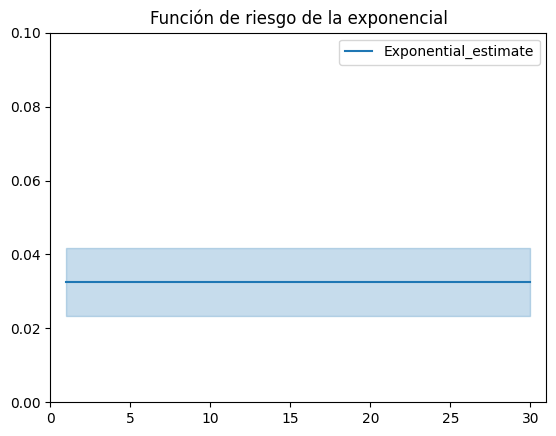

In [6]:
exponencial.plot_hazard()
plt.xlim(0, 31)
plt.ylim(0, 0.1)
plt.title('Función de riesgo de la exponencial')

c) ¿Cuáles  el  riesgo  de  que una empresa  quiebre  según  la  función exponencial?

In [7]:
exponencial.hazard_

,Exponential_estimate
1.000000,0.032498
1.292929,0.032498
1.585859,0.032498
1.878788,0.032498
2.171717,0.032498
...,...
28.828283,0.032498
29.121212,0.032498
29.414141,0.032498
29.707071,0.032498


Se puede observar que el riesgo es constante con un  valor de 0.032498, entonces el riesgo de quiebra es constante con el tiempo.

#Problema 4

a) Ajuste un modelo Weibull de supervivencia

In [8]:
weibull = WeibullFitter().fit(quiebra['tiempo'], quiebra['quebrar'])
weibull

<lifelines.WeibullFitter:"Weibull_estimate", fitted with 100 total observations, 52 right-censored observations>

b) Grafique la función de riesgo

Text(0.5, 1.0, 'Función de riesgo de la Weibull')

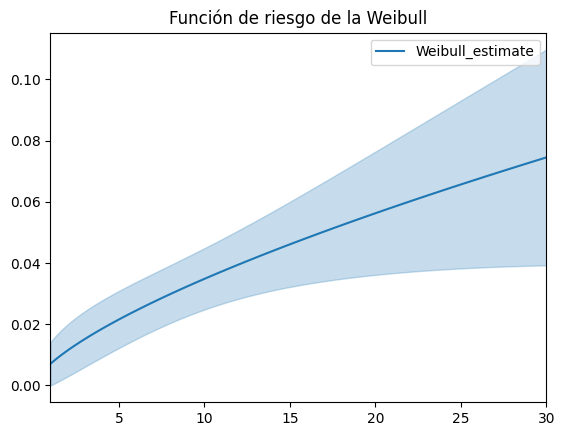

In [9]:
weibull.plot_hazard()
plt.xlim(quiebra['tiempo'].min(), quiebra['tiempo'].max());
plt.title('Función de riesgo de la Weibull')

c) ¿Qué forma tiene la función de riesgo? y ¿qué significa?

Se observa que la grafica de la función de riesgo de Weibull es creciente, lo que significa que el riesgo de quiebra aumenta con el tiempo.

#Problema 5

a) Ajuste un modelo Log-Normal

In [10]:
logn = LogNormalFitter().fit(quiebra['tiempo'], quiebra['quebrar'])
logn

<lifelines.LogNormalFitter:"LogNormal_estimate", fitted with 100 total observations, 52 right-censored observations>

b) Grafique la función de riesgo

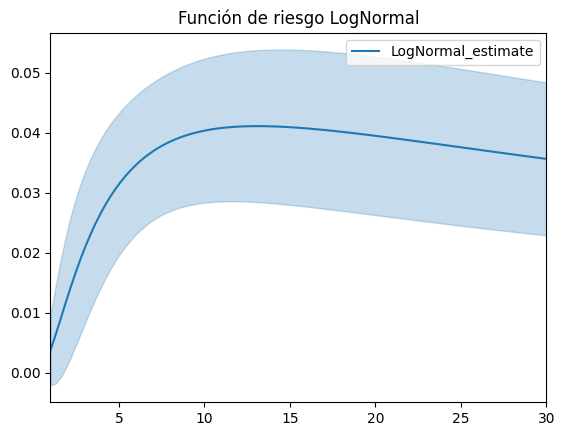

In [12]:
logn.plot_hazard()
plt.xlim(quiebra['tiempo'].min(), quiebra['tiempo'].max())
plt.title('Función de riesgo LogNormal');

c) En qué periodo el riesgo de quebrar es creciente y en cuál decreciente

In [36]:
#Máximo
logn_hazard = pd.DataFrame(logn.hazard_,columns=['periodo','hazard'])
logn_hazard['hazard'] = logn.hazard_
logn_hazard['periodo'] = logn.hazard_.index
logn_hazard = logn_hazard.set_index('periodo')
logn_hazard[logn_hazard['hazard'] == logn_hazard['hazard'].max()]

,hazard
periodo,
13.010101,0.041069


In [34]:
#Mínimo
logn_hazard[logn_hazard['hazard'] == logn_hazard['hazard'].min()]

,hazard
periodo,
1.0,0.003749


Con lo anterior se puede decir que el riego de quebrar es creciente en el periodo 1 y es decreciente en el periodo 13.01

#Problema 6

Utilizando  elestimador  de  Kaplan-Meier realice  una  notebook  en  Python para responder lo siguiente:

a) Estime   la   función   de   supervivencia   y   la   mediana   de   tiempo   de supervivencia y diga que significa.

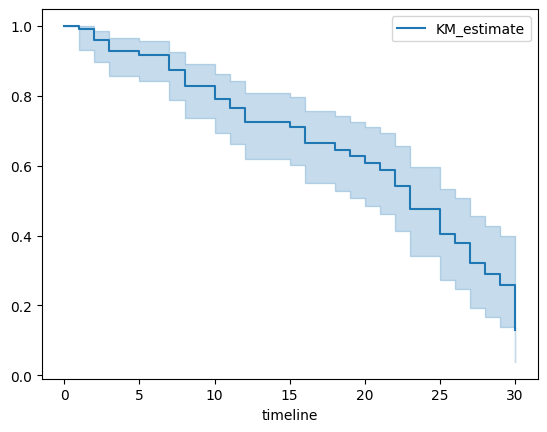

In [14]:
#Función de supervivencia
kaplan = KaplanMeierFitter().fit(quiebra['tiempo'], quiebra['quebrar'])
kaplan.plot_survival_function();

In [16]:
#Mediana
kaplan.median_survival_time_

23.0

El 50% de las empresas quebraron al año 23.

b) Estime  la  función  de  supervivencia  por  Kaplan-meier  para  hombres  y mujeres  y  grafique  con .plot_survival_function(ci_show=False)y  diga  si  las empresas administradas por hombres/mujeres quiebran más rápido. No olvide etiquetar cada línea y agregar todos los elementos en cada gráfica.

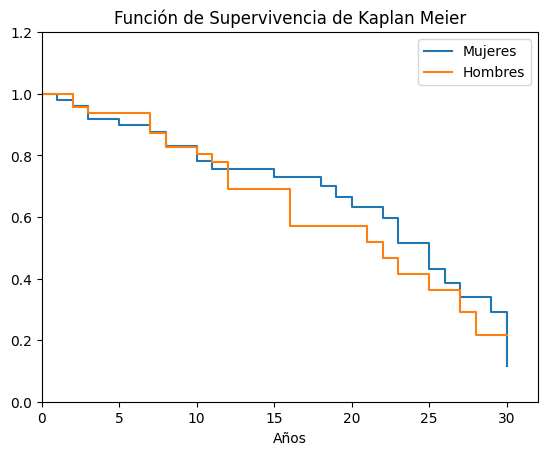

In [29]:
#Separar los hombres de las mujeres
m = quiebra.query('mujer==1')
h = quiebra.query('mujer==0')
#Estimar el modelo
kaplan_m = KaplanMeierFitter().fit(m['tiempo'],m['quebrar'])
kaplan_h = KaplanMeierFitter().fit(h['tiempo'],h['quebrar'])
#Grafica
kaplan_m.plot_survival_function(label='Mujeres',ci_show=False)
kaplan_h.plot_survival_function(label='Hombres',ci_show=False)
plt.xlim(0, 32)
plt.ylim(0, 1.2)
plt.xlabel('Años')
plt.title('Función de Supervivencia de Kaplan Meier')
plt.show()

Por la grafica anterior, se puede decir que los hombres que fundan una empresa el tiempo que duran es menor a las mujeres que fundan una empresa.

c) El profesor cree que las empresas fundadaspor hombres quiebran más rápido,   refute   o   confirme   con   evidencia   estadística   tal   afirmación (pruebas de hipótesis, graficas, tablas etc.)

In [30]:
#Mediana de mujeres
kaplan_m.median_survival_time_

25.0

El 50% de las empresas fundadas por mujeres duran menos de 25 años.

In [31]:
#Mediana de hombres
kaplan_h.median_survival_time_

22.0

El 50% de las empresas fundadas por hombres duran menos de 22 años.

Pruebas de hipotesis:

$H_0 : S(1) = S(2)$ funciones de supervivencia iguales

$H_a : S(1) \neq S(2)$ funciones de supervivencia distintas

In [32]:
#P_valor
from lifelines.statistics import logrank_test
LRT = logrank_test(h['tiempo'],m['tiempo'],h['quebrar'],m['quebrar'])
LRT.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.28 0.59      0.75

Como $0.59 < 0.50$ no se cumple.

Con un $\alpha = 0.05$, no se rechaza $H_0$, entonces se puede decir que es no importa si una empresa fue fundada por un hombre o por una mujer para que la empresa quiebre.

Por lo que la idea de que las empresas fundadas por hombres quiebran más rápido no es verdad.